In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import sys
sys.path.insert(0, '../scripts')
from utils import *

In [2]:
plt.rcParams['figure.figsize'] = (12, 10)

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [7]:
train_data = pd.read_csv('../data/clean-train.csv').dropna(axis=0)
test_data = pd.read_csv('../data/clean-test.csv').dropna(axis=0)

In [8]:
max_ngram = 6

In [10]:
q1_list = train_data['q1'].str.split(' ')
q2_list = train_data['q2'].str.split(' ')

In [11]:
counts = np.empty((q1_list.shape[0], max_ngram))

for i in range(q1_list.shape[0]):
    for j in range(max_ngram):
        try:
            counts[i, j] = count_similar(q1_list.iloc[i], q2_list.iloc[i], int(j)+1)
        except:
            print(i, j)

In [12]:
q1_list_test = test_data['q1'].str.split(' ')
q2_list_test = test_data['q2'].str.split(' ')

counts_test = np.empty((q1_list_test.shape[0], max_ngram))

for i in range(q1_list_test.shape[0]):
    for j in range(max_ngram):
        counts_test[i, j] = count_similar(q1_list_test.iloc[i], q2_list_test.iloc[i], j+1)

### Train Logistic Regression Model

In [13]:
regressions = []
train_scores = np.empty((counts.shape[1], 3))
test_scores = np.empty((counts.shape[1], 3))

for i in range(counts.shape[1]):
    prt_str = 'Regressions including all upto {}-Grams'.format(i+1)
    print(prt_str)
    print('-' * len(prt_str))
    temp = LogisticRegression(class_weight='balanced')
    temp.fit(counts[:, :(i+1)], train_data['is_same'])
    print('Training Data')
    print('-' * len('Training Data'))
    train_scores[i, :] = generate_report(train_data['is_same'], temp.predict(counts[:, :(i+1)]),
                temp.predict_proba(counts[:, :(i+1)])[:, 1])
    print('')
    print('')
    print('Testing Data')
    print('-' * len('Testing Data'))
    test_scores[i, :] = generate_report(test_data['is_same'], temp.predict(counts_test[:, :(i+1)]),
                    temp.predict_proba(counts_test[:, :(i+1)])[:, 1])
    regressions.append(temp)
    print('')
    print('')

Regressions including all upto 1-Grams
--------------------------------------
Training Data
-------------
Loss Report
-----------

Accuracy Score: 0.6480
ROC  AUC Score: 0.6885
Log Loss Score: 0.6547


Testing Data
------------
Loss Report
-----------

Accuracy Score: 0.6494
ROC  AUC Score: 0.6893
Log Loss Score: 0.6547


Regressions including all upto 2-Grams
--------------------------------------
Training Data
-------------
Loss Report
-----------

Accuracy Score: 0.6202
ROC  AUC Score: 0.6803
Log Loss Score: 0.6510


Testing Data
------------
Loss Report
-----------

Accuracy Score: 0.6217
ROC  AUC Score: 0.6814
Log Loss Score: 0.6510


Regressions including all upto 3-Grams
--------------------------------------
Training Data
-------------
Loss Report
-----------

Accuracy Score: 0.6364
ROC  AUC Score: 0.6895
Log Loss Score: 0.6404


Testing Data
------------
Loss Report
-----------

Accuracy Score: 0.6373
ROC  AUC Score: 0.6903
Log Loss Score: 0.6404


Regressions including all up

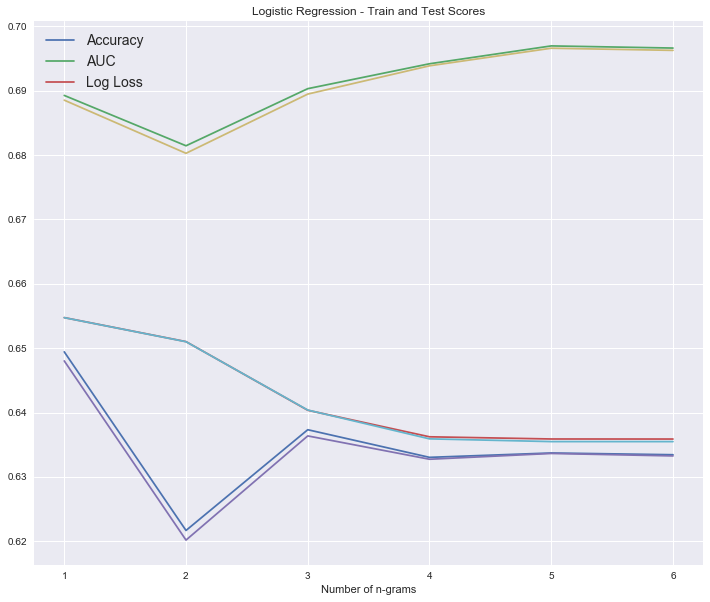

In [14]:
lineObjects = plt.plot(np.arange(1, max_ngram + 1), test_scores)
plt.title('Logistic Regression - Train and Test Scores')
plt.xlabel('Number of n-grams')
plt.xticks(range(1, max_ngram + 1))
lineObjects_train = plt.plot(np.arange(1, max_ngram + 1), train_scores)
plt.legend(iter(lineObjects), ('Accuracy', 'AUC', 'Log Loss'), fontsize=14)

### Train MLP Classifier

In [15]:
mlps = []
train_scores_mlp = np.empty((counts.shape[1], 3))
test_scores_mlp = np.empty((counts.shape[1], 3))

for i in range(counts.shape[1]):
    prt_str = 'MLP including all upto {}-Grams'.format(i+1)
    print(prt_str)
    print('-' * len(prt_str))
    temp = MLPClassifier()
    temp.fit(counts[:, :(i+1)], train_data['is_same'])
    print('Training Data')
    print('-' * len('Training Data'))
    train_scores_mlp[i, :] = generate_report(train_data['is_same'], temp.predict(counts[:, :(i+1)]),
                temp.predict_proba(counts[:, :(i+1)])[:, 1])
    print('')
    print('')
    print('Testing Data')
    print('-' * len('Testing Data'))
    test_scores_mlp[i, :] = generate_report(test_data['is_same'], temp.predict(counts_test[:, :(i+1)]),
                    temp.predict_proba(counts_test[:, :(i+1)])[:, 1])
    mlps.append(temp)
    print('')
    print('')

MLP including all upto 1-Grams
------------------------------
Training Data
-------------
Loss Report
-----------

Accuracy Score: 0.6579
ROC  AUC Score: 0.6995
Log Loss Score: 0.5860


Testing Data
------------
Loss Report
-----------

Accuracy Score: 0.6586
ROC  AUC Score: 0.6999
Log Loss Score: 0.5869


MLP including all upto 2-Grams
------------------------------
Training Data
-------------
Loss Report
-----------

Accuracy Score: 0.6629
ROC  AUC Score: 0.7101
Log Loss Score: 0.5814


Testing Data
------------
Loss Report
-----------

Accuracy Score: 0.6633
ROC  AUC Score: 0.7101
Log Loss Score: 0.5824


MLP including all upto 3-Grams
------------------------------
Training Data
-------------
Loss Report
-----------

Accuracy Score: 0.6600
ROC  AUC Score: 0.7116
Log Loss Score: 0.5809


Testing Data
------------
Loss Report
-----------

Accuracy Score: 0.6594
ROC  AUC Score: 0.7115
Log Loss Score: 0.5818


MLP including all upto 4-Grams
------------------------------
Training Data


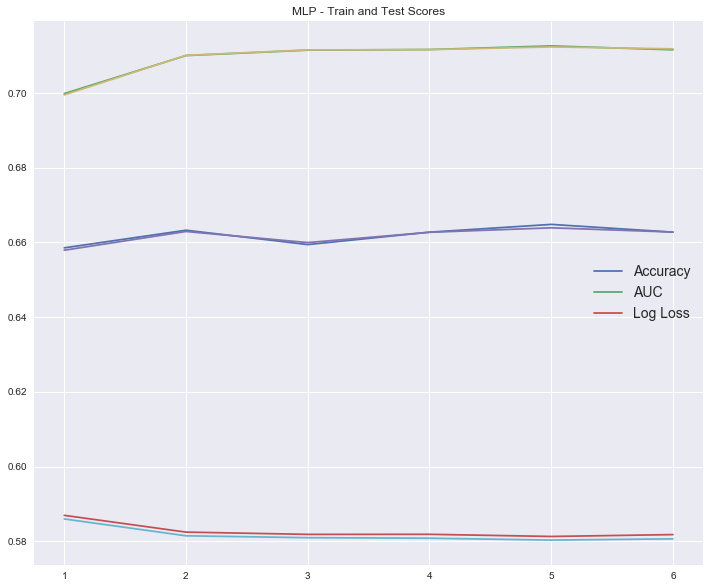

In [16]:
lineObjects = plt.plot(np.arange(1, max_ngram + 1), test_scores_mlp)
plt.title('MLP - Train and Test Scores')
plt.xticks(range(1, max_ngram + 1))
lineObjects_train = plt.plot(np.arange(1, max_ngram + 1), train_scores_mlp)
plt.legend(iter(lineObjects), ('Accuracy', 'AUC', 'Log Loss'), fontsize=14)